### Missing Data ###

#### A Test of Missing Completely at Random for Multivariate Data ####

* Two independent Sample T test
* Visual Techniques
* Correlation Analysis
* Little’s MCAR test

#### Deleting Methods ####

* Deleting a value or observation
* Listwise Method
* Pairwise Method

#### Imputation Methods ####

* Hot-deck imputation
* Cold-deck imputation
* Mean, Median and Mode
* 

#### With Predict Methods ####

* EM
* Multiple Imputation
* Machine Learning

In [101]:
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv('data_home.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Deleting a missing value

#### 1- Deleting missing values directly,we use with 'dropna()' ####

In [12]:
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df.dropna(inplace=True)

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### If at least one missing value,'dropna()' delete that axis. ####

In [32]:
df_2=pd.read_csv('BTC-USD.csv')
df_2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10
2471,2021-06-23,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10
2472,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
2473,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10


In [14]:
df_2.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [15]:
df_2.dropna(how='all')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10
2471,2021-06-23,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10
2472,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
2473,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10


In [16]:
df_2.dropna(axis=1, how='all')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10
2471,2021-06-23,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10
2472,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
2473,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10


In [17]:
df_2['Low']

0         452.421997
1         413.104004
2         384.532013
3         389.882996
4         393.181000
            ...     
2470    28893.621094
2471    31772.632813
2472    32385.214844
2473    31350.884766
2474    31389.406250
Name: Low, Length: 2475, dtype: float64

#### 2-Define the values of all mean for missing values. ####

#### Mean, Median and Mode for single variable ####

In [18]:
df_2['Low'].mean()

7615.020411983002

In [19]:
df_2['Low'].fillna(df_2['Low'].mean())

0         452.421997
1         413.104004
2         384.532013
3         389.882996
4         393.181000
            ...     
2470    28893.621094
2471    31772.632813
2472    32385.214844
2473    31350.884766
2474    31389.406250
Name: Low, Length: 2475, dtype: float64

In [20]:
df_2['Open'].fillna(df_2['Open'].mean())

0         465.864014
1         456.859985
2         424.102997
3         394.673004
4         408.084991
            ...     
2470    31622.376953
2471    32515.714844
2472    33682.800781
2473    34659.105469
2474    31389.406250
Name: Open, Length: 2475, dtype: float64

In [21]:
df_2['High'].fillna(df_2['High'].median())

0         468.174011
1         456.859985
2         427.834991
3         423.295990
4         412.425995
            ...     
2470    33292.453125
2471    34753.410156
2472    35228.851563
2473    35487.246094
2474    32168.152344
Name: High, Length: 2475, dtype: float64

In [22]:
df_2['High'].fillna(5)

0         468.174011
1         456.859985
2         427.834991
3         423.295990
4         412.425995
            ...     
2470    33292.453125
2471    34753.410156
2472    35228.851563
2473    35487.246094
2474    32168.152344
Name: High, Length: 2475, dtype: float64

In [17]:
df_3=pd.read_csv('train_tmp.csv')
df_3.head(10)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Dayofweek,Dayofyear
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014,9,17,2,260
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014,9,18,3,261
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014,9,19,4,262
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014,9,20,5,263
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014,9,21,6,264
5,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,2014,9,22,0,265
6,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0,2014,9,23,1,266
7,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,2014,9,24,2,267
8,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,2014,9,25,3,268
9,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0,2014,9,26,4,269


In [18]:
df_3.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

#### Mean, Median and Mode for multiple variables ####

In [19]:
a=df_3.apply(lambda x: x.fillna(x.mean()), axis=0)
a

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Dayofweek,Dayofyear
0,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,2014,9,17,2,260
1,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014,9,18,3,261
2,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014,9,19,4,262
3,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014,9,20,5,263
4,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014,9,21,6,264
...,...,...,...,...,...,...,...,...,...,...,...
2470,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10,2021,6,22,1,173
2471,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10,2021,6,23,2,174
2472,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10,2021,6,24,3,175
2473,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10,2021,6,25,4,176


In [20]:
a.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

#### VISUALIZATION FOR MISSING VALUE ####

In [21]:
!pip install missingno


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import missingno as msno

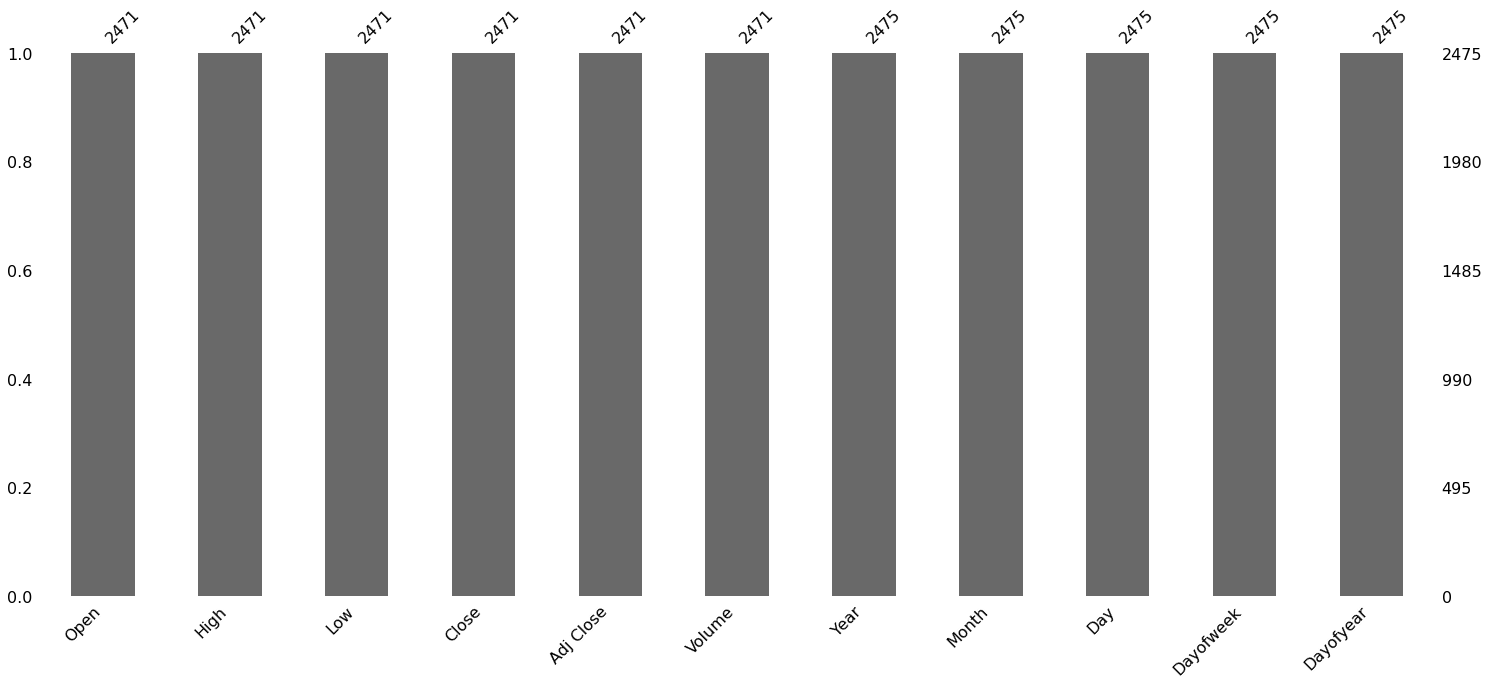

In [25]:
msno.bar(df_3);

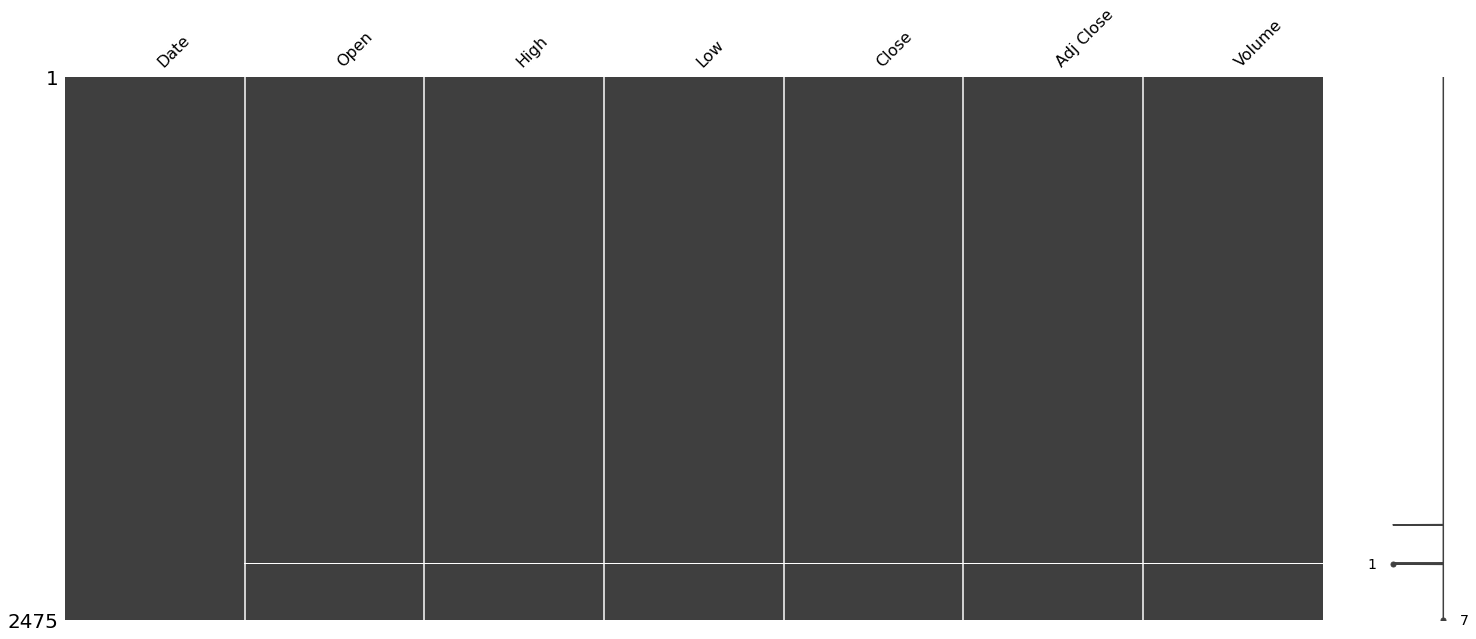

In [33]:
msno.matrix(df_2);

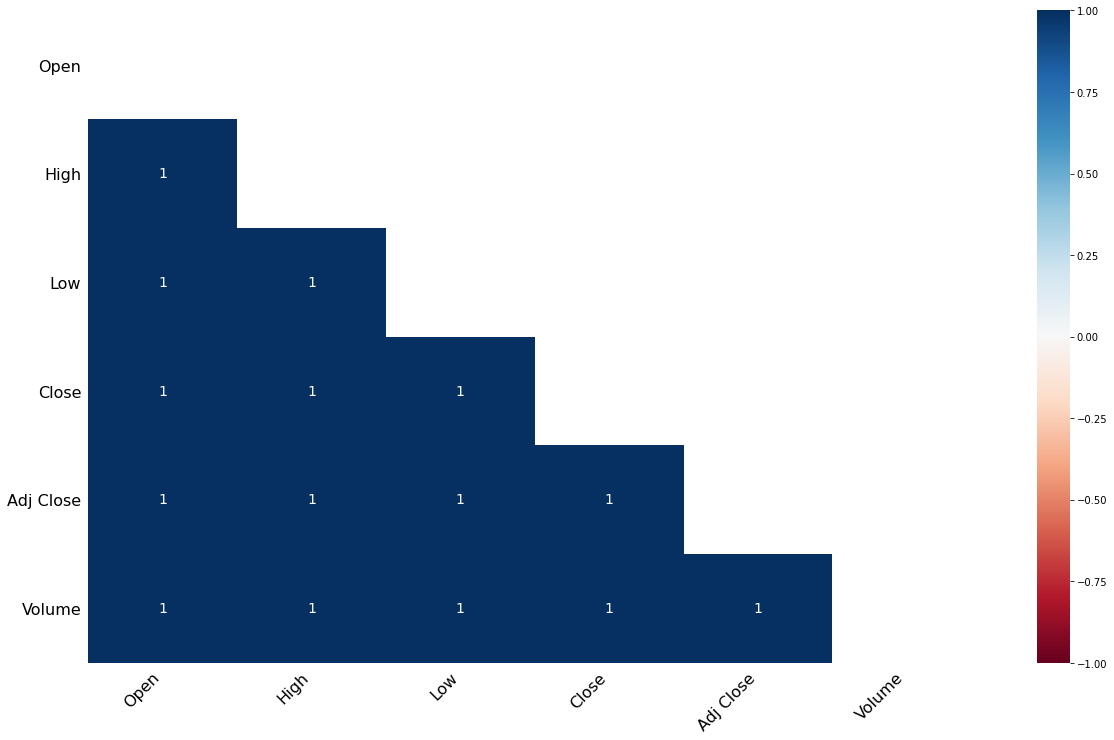

In [34]:
msno.heatmap(df_2);

#### NUMERIC ASSIGNMENT FOR MİSSİNG VALUES ####

In [35]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [39]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotArea'].mean())

In [41]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [40]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [42]:
df['PoolQC']=df['PoolQC'].fillna(df['LotArea'].median())

In [47]:
df['PoolQC'].isnull().sum()

0

In [51]:
df_3.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

Here's,for more than variable we write a python function with 'apply'

In [52]:
a=df_3.apply(lambda x: x.fillna(x.mean()), axis=0)
a

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Dayofweek,Dayofyear
0,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,2014,9,17,2,260
1,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014,9,18,3,261
2,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014,9,19,4,262
3,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014,9,20,5,263
4,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014,9,21,6,264
...,...,...,...,...,...,...,...,...,...,...,...
2470,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10,2021,6,22,1,173
2471,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10,2021,6,23,2,174
2472,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10,2021,6,24,3,175
2473,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10,2021,6,25,4,176


If we want to fill all the missing value and use the mean of all values,we write following code

In [53]:
df.fillna(df.mean()[:])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,9478.5,NaN,NaN,0,4,2010,WD,Normal,142125


In [60]:
df_3

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Dayofweek,Dayofyear
0,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,2014,9,17,2,260
1,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014,9,18,3,261
2,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014,9,19,4,262
3,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014,9,20,5,263
4,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014,9,21,6,264
...,...,...,...,...,...,...,...,...,...,...,...
2470,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10,2021,6,22,1,173
2471,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10,2021,6,23,2,174
2472,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10,2021,6,24,3,175
2473,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10,2021,6,25,4,176


In [61]:
df_3.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

We call where the 'nan' values to find or see them

In [65]:
df_2.where(pd.notna(df), axis=0)

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CATEGORY ASSIGNMENT FOR MİSSİNG VALUES ####

In [92]:
df_d=sns.load_dataset('penguins')
df_d

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [93]:
df_d.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [113]:
df_d.groupby('sex')['body_mass_g'].mean()


sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64

In [118]:
#df_d['body_mass_g'].fillna(df_d.groupby('sex')['body_mass_g'].transform('mean'))

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

#### One of the best methods is filling with mode. ####

In [124]:
df_d['bill_length_mm'].mode()

0    41.1
dtype: float64

In [129]:
#df_d['bill_length_mm'].fillna(df_d['bill_length_mm'].mode())

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

In [133]:
df_d['sex'].fillna(method='bfill')

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
339    Female
340    Female
341      Male
342    Female
343      Male
Name: sex, Length: 344, dtype: object

In [132]:
df_d['sex'].fillna(method='ffill')

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
339    Female
340    Female
341      Male
342    Female
343      Male
Name: sex, Length: 344, dtype: object

#### FİİL WİTH KNN,FOREST AND EM ####

WİTH KNN

In [274]:
!pip install ycimpute


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [273]:
from ycimpute.imputer import knnimput

In [225]:
ddf=pd.read_csv('BTC-USD.csv')
ddf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10
2471,2021-06-23,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10
2472,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
2473,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10


In [181]:
ddf.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

In [182]:
names=list(ddf)
names

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Year',
 'Month',
 'Day',
 'Dayofweek',
 'Dayofyear']

In [183]:
ddf_n=np.array(ddf)
ddf_n

array([[4.65864014e+02, 4.68174011e+02, 4.52421997e+02, ...,
        1.70000000e+01, 2.00000000e+00, 2.60000000e+02],
       [4.56859985e+02, 4.56859985e+02, 4.13104004e+02, ...,
        1.80000000e+01, 3.00000000e+00, 2.61000000e+02],
       [4.24102997e+02, 4.27834991e+02, 3.84532013e+02, ...,
        1.90000000e+01, 4.00000000e+00, 2.62000000e+02],
       ...,
       [3.36828008e+04, 3.52288516e+04, 3.23852148e+04, ...,
        2.40000000e+01, 3.00000000e+00, 1.75000000e+02],
       [3.46591055e+04, 3.54872461e+04, 3.13508848e+04, ...,
        2.50000000e+01, 4.00000000e+00, 1.76000000e+02],
       [3.13894062e+04, 3.21681523e+04, 3.13894062e+04, ...,
        2.60000000e+01, 5.00000000e+00, 1.77000000e+02]])

k is amount of neighbor

In [184]:
ddf_n_1=knnimput.KNN(k = 3).complete(ddf_n)

Imputing row 1/2475 with 0 missing, elapsed time: 1.010
Imputing row 101/2475 with 0 missing, elapsed time: 1.011
Imputing row 201/2475 with 0 missing, elapsed time: 1.012
Imputing row 301/2475 with 0 missing, elapsed time: 1.012
Imputing row 401/2475 with 0 missing, elapsed time: 1.013
Imputing row 501/2475 with 0 missing, elapsed time: 1.013
Imputing row 601/2475 with 0 missing, elapsed time: 1.014
Imputing row 701/2475 with 0 missing, elapsed time: 1.015
Imputing row 801/2475 with 0 missing, elapsed time: 1.015
Imputing row 901/2475 with 0 missing, elapsed time: 1.015
Imputing row 1001/2475 with 0 missing, elapsed time: 1.016
Imputing row 1101/2475 with 0 missing, elapsed time: 1.016
Imputing row 1201/2475 with 0 missing, elapsed time: 1.017
Imputing row 1301/2475 with 0 missing, elapsed time: 1.017
Imputing row 1401/2475 with 0 missing, elapsed time: 1.017
Imputing row 1501/2475 with 0 missing, elapsed time: 1.018
Imputing row 1601/2475 with 0 missing, elapsed time: 1.019
Imputing 

Name this columns again and create a pandas dataframe

In [185]:
ddf=pd.DataFrame(ddf_n_1, columns=names)
ddf

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Dayofweek,Dayofyear
0,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,2014.0,9.0,17.0,2.0,260.0
1,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014.0,9.0,18.0,3.0,261.0
2,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014.0,9.0,19.0,4.0,262.0
3,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014.0,9.0,20.0,5.0,263.0
4,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014.0,9.0,21.0,6.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...
2470,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10,2021.0,6.0,22.0,1.0,173.0
2471,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10,2021.0,6.0,23.0,2.0,174.0
2472,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10,2021.0,6.0,24.0,3.0,175.0
2473,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10,2021.0,6.0,25.0,4.0,176.0


In [186]:
ddf.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
Dayofweek    0
Dayofyear    0
dtype: int64

With Random Forest

In [284]:
df_r=pd.read_csv('BTC-USD.csv')
df_r

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.376953,33292.453125,28893.621094,32505.660156,32505.660156,5.896435e+10
2471,2021-06-23,32515.714844,34753.410156,31772.632813,33723.027344,33723.027344,4.631711e+10
2472,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
2473,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10


In [285]:
df_r.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

Transform this to numpay array

In [286]:
df_r_n=np.array(df_r)

In [287]:
names_r=list(df_r)
names_r

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [288]:
from ycimpute.imputer import iterforest

In [289]:
iterforest.IterImput().complete(df_r_n)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [290]:
ddf_p=pd.DataFrame(df_r_n, columns=names_r)
ddf_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,2.10568e+07
1,2014-09-18,456.86,456.86,413.104,424.44,424.44,3.44832e+07
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,3.79197e+07
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,3.68636e+07
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,2.65801e+07
...,...,...,...,...,...,...,...
2470,2021-06-22,31622.4,33292.5,28893.6,32505.7,32505.7,5.89644e+10
2471,2021-06-23,32515.7,34753.4,31772.6,33723,33723,4.63171e+10
2472,2021-06-24,33682.8,35228.9,32385.2,34662.4,34662.4,3.31234e+10
2473,2021-06-25,34659.1,35487.2,31350.9,31637.8,31637.8,4.02309e+10


With EM

In [291]:
from ycimpute.imputer import EM

In [292]:
df_e=sns.load_dataset('titanic')
df_e

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [293]:
df_e=df_e.select_dtypes(include =['float64','int64'])
df_e

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [294]:
df_e.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [295]:
names_3=list(df_e)
names_3

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [296]:
df_n=np.array(df_e)
df_n

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [297]:
df_f=EM().complete(df_n)

In [298]:
df_e=pd.DataFrame(df_f)
df_e

,0,1,2,3,4,5
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,0.0,1.0,2.0,23.4500
889,1.0,1.0,26.0,0.0,0.0,30.0000


In [299]:
df_e.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64